In [1]:
from patching import (
    import_shapefile_for_patches,
    do_the_patching,
    store_coco_ground_truth,
    import_image,
)

In [45]:
from patchutils.coco import save_gt_overlaid
from docopt import docopt
import os
import glob
import rasterio
import geopandas as gp
from matplotlib import pyplot
from datetime import datetime
import geopandas as gpd

num_patches=1000
patch_size=128
scenes_path="/home/robert/ds-wildfire/data/scenes"
scenes="31/T/GJ"
scenes_string="_31_T_GJ_"
shapefile="/data/raw_data/wildfires-ground-truth/france/vars/N_DFCI_CONTOUR_FEUX_2017_S_083.shp"
save_path="/home/robert/ds-wildfire/data"
class_name="DATE_ECLOS"

In [34]:
date = {}
date_datetime={}
date_string={}

In [35]:
    path_to_store_patches = os.path.join(save_path, "patches")
    os.makedirs(path_to_store_patches, exist_ok=True)
    path_to_store_anno = os.path.join(save_path, "anno")
    os.makedirs(path_to_store_anno, exist_ok=True)

In [36]:
path_to_scene = os.path.join(
            scenes_path, scenes)
        
list_of_paths = glob.glob(
            path_to_scene + "/*/*/*/" + "*.jp2".format(scenes)
        )

In [37]:
path_to_scene

'/home/robert/ds-wildfire/data/scenes/31/T/GJ'

In [38]:
list_of_paths

['/home/robert/ds-wildfire/data/scenes/31/T/GJ/2015/8/6/B8AB11B12.jp2',
 '/home/robert/ds-wildfire/data/scenes/31/T/GJ/2015/8/12/B8AB11B12.jp2',
 '/home/robert/ds-wildfire/data/scenes/31/T/GJ/2015/7/30/B8AB11B12.jp2',
 '/home/robert/ds-wildfire/data/scenes/31/T/GJ/2016/7/11/B8AB11B12.jp2',
 '/home/robert/ds-wildfire/data/scenes/31/T/GJ/2016/7/21/B8AB11B12.jp2',
 '/home/robert/ds-wildfire/data/scenes/31/T/GJ/2016/7/17/B8AB11B12.jp2',
 '/home/robert/ds-wildfire/data/scenes/31/T/GJ/2016/7/14/B8AB11B12.jp2',
 '/home/robert/ds-wildfire/data/scenes/31/T/GJ/2017/6/16/B8AB11B12.jp2',
 '/home/robert/ds-wildfire/data/scenes/31/T/GJ/2017/6/19/B8AB11B12.jp2',
 '/home/robert/ds-wildfire/data/scenes/31/T/GJ/2017/6/12/B8AB11B12.jp2',
 '/home/robert/ds-wildfire/data/scenes/31/T/GJ/2017/9/7/B8AB11B12.jp2',
 '/home/robert/ds-wildfire/data/scenes/31/T/GJ/2017/9/4/B8AB11B12.jp2',
 '/home/robert/ds-wildfire/data/scenes/31/T/GJ/2017/9/5/B8AB11B12.jp2',
 '/home/robert/ds-wildfire/data/scenes/31/T/GJ/2017/7/2

In [42]:
for date_var in range (0, len(list_of_paths)):
    date_index = list_of_paths[date_var].index("201")
    date_end_index = list_of_paths[date_var].index("/B8A")
    date[date_var] = list_of_paths[date_var][date_index:date_end_index]
    date_datetime[date_var] = datetime.strptime(date[date_var], '%Y/%m/%d')
    date_string[date_var]=date_datetime[date_var].strftime('%Y_%m_%d')
    raster = import_image(list_of_paths[date_var])
    raster_meta = raster.meta
    
    patch_dfs, patch_windows = import_shapefile_for_patches(
        shapefile, raster, raster_meta, patch_size, num_patches, scenes_string + date_string[date_var]
    )
    
    do_the_patching(
                raster,
                path_to_store_patches,
                patch_windows.keys(),
                patch_windows.values(),
                bands=[3,2,1],
    )
    
    store_coco_ground_truth(
                path_to_store_anno, patch_dfs, patch_size, class_name, scenes_string + date_string[date_var]
    )

1764it [00:04, 401.87it/s]
15it [00:00, 243.44it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2015_08_06.json


1764it [00:04, 402.08it/s]
15it [00:00, 289.52it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2015_08_12.json


1764it [00:04, 401.88it/s]
15it [00:00, 215.15it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2015_07_30.json


1764it [00:04, 401.31it/s]
15it [00:00, 284.14it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2016_07_11.json


1764it [00:04, 401.97it/s]
15it [00:00, 276.48it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2016_07_21.json


1764it [00:04, 401.44it/s]
15it [00:00, 286.34it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2016_07_17.json


1764it [00:04, 402.17it/s]
15it [00:00, 218.03it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2016_07_14.json


1764it [00:04, 402.44it/s]
15it [00:00, 275.56it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017_06_16.json


1764it [00:04, 402.02it/s]
15it [00:00, 201.16it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017_06_19.json


1764it [00:04, 402.29it/s]
15it [00:00, 276.13it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017_06_12.json


1764it [00:04, 401.85it/s]
15it [00:00, 212.48it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017_09_07.json


1764it [00:04, 401.84it/s]
15it [00:00, 304.92it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017_09_04.json


1764it [00:04, 401.71it/s]
15it [00:00, 288.87it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017_09_05.json


1764it [00:04, 402.08it/s]
15it [00:00, 282.65it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017_07_22.json


1764it [00:04, 402.55it/s]
15it [00:00, 206.21it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017_07_24.json


1764it [00:04, 401.85it/s]
15it [00:00, 274.93it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017_07_26.json


1764it [00:04, 402.36it/s]
15it [00:00, 276.01it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017_10_09.json


1764it [00:04, 402.24it/s]
15it [00:00, 206.06it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017_10_07.json


1764it [00:04, 402.05it/s]
15it [00:00, 302.71it/s]


Writing new json file... /home/robert/ds-wildfire/data/anno/anno_31_T_GJ_2017_10_10.json


In [58]:
import fiona; help(fiona.open)


Help on function open in module fiona:

open(fp, mode='r', driver=None, schema=None, crs=None, encoding=None, layer=None, vfs=None, enabled_drivers=None, crs_wkt=None, **kwargs)
    Open a collection for read, append, or write
    
    In write mode, a driver name such as "ESRI Shapefile" or "GPX" (see
    OGR docs or ``ogr2ogr --help`` on the command line) and a schema
    mapping such as:
    
      {'geometry': 'Point',
       'properties': [('class', 'int'), ('label', 'str'),
                      ('value', 'float')]}
    
    must be provided. If a particular ordering of properties ("fields"
    in GIS parlance) in the written file is desired, a list of (key,
    value) pairs as above or an ordered dict is required. If no ordering
    is needed, a standard dict will suffice.
    
    A coordinate reference system for collections in write mode can be
    defined by the ``crs`` parameter. It takes Proj4 style mappings like
    
      {'proj': 'longlat', 'ellps': 'WGS84', 'datum': 'W

In [71]:
gdf = gpd.read_file(shapefile)

In [ ]:
date="2017-06-15"

In [84]:
gdf_date= gdf.loc[(gdf['DATE_ECLOS']<="2017_06_15")]

In [85]:
gdf

,ID_PROMETH,HEURE_DEBU,COMMUNE_EC,DATE_ECLOS,LIEU_DIT,SURFACE_SI,SURFACE_DE,QUALITE_DO,ENQUETE_FE,OBSERVATIO,geometry
0,2694,13h30,RAMATUELLE,2017-06-07,LA QUESSINE,1.572297e+05,"15,64 ha",RELEVE GPS,RCCI_MACHINE-OUTILS,TONDEUSE,"MULTIPOLYGON (((996933.218 6240075.129, 996934..."
1,5135,19h35,LA CROIX-VALMER,2017-07-24,GIGARO,0.000000e+00,506 ha,IMAGE SATELLITE SENTINEL,RCCI_JETS OBJETS INCANDESCENTS,Synthèse IMAGE SENTINEL 2 et relevés GPS,"MULTIPOLYGON (((996138.181 6237162.083, 996167..."
2,0,None,TRIGANCE,2017-06-15,COLLINE D'ESTELLE,1.158500e+06,"115, 80 ha",IMAGE SATELLITE SENTINEL,CANJUERS TIRS MUNITIONS,TRAITEMENT IMAGE SENTINEL 2,"POLYGON ((976398.645 6294995.096, 976398.604 6..."
3,4669,23h00,LA LONDE-LES-MAURES,2017-07-25,VAL ROSE,1.423050e+07,"1423,05 ha",IMAGE SATELLITE SENTINEL,RCCI _MALVEILLANCE_SUPPOSEE,TRAITEMENT IMAGE SENTINEL 2,"MULTIPOLYGON (((967149.726 6232341.320, 967169..."
4,4787,14h30,BORMES-LES-MIMOSAS,2017-07-07,SIOUVETTE,0.000000e+00,"4,47 ha",RELEVE GPS,RCCI_JETS OBJETS INCANDESCENTS,SUPPOSEE,"POLYGON ((979999.922 6240348.027, 979994.476 6..."
5,2601,13h26,BORMES-LES-MIMOSAS,2017-06-21,HAUT PARA,0.000000e+00,"3,17 ha",RELEVE GPS,RCCI_MACHINE-OUTILS,cause accidentelle (travaux forestiers),"POLYGON ((970608.889 6233760.310, 970587.150 6..."
6,5133,22h12,ARTIGUES,2017-07-24,COLLE PELADE,1.780380e+07,1704 ha,IMAGE SATELLITE SENTINEL,RCCI _MALVEILLANCE,TRAITEMENT IMAGE SENTINEL 2,"MULTIPOLYGON (((934652.103 6275662.078, 934646..."
7,6496,16h28,FREJUS,2017-09-01,A8 CAPITOU,3.470000e+05,"34,7 ha",GPS,RCCI_JETS OBJETS INCANDESCENTS,None,"MULTIPOLYGON (((1004320.901 6272550.143, 10042..."
8,6782,22h00,HYERES,2017-09-02,CHEMIN DES MAURES,4.318000e+06,431 ha,RELEVE TERRAIN,RCCI_MALVEILLANCE,None,"MULTIPOLYGON (((959136.098 6233651.015, 959161..."
9,0,None,COMPS/ARTUBY,2017-10-08,LA VERRERIE,2.381340e+02,"238,13 ha",IMAGE SATELLITE SENTINEL,CANJUERS TIRS MUNITIONS,TRAITEMENT IMAGE SENTINEL 2,"MULTIPOLYGON (((980684.678 6292938.727, 980684..."


In [86]:
gdf_date

,ID_PROMETH,HEURE_DEBU,COMMUNE_EC,DATE_ECLOS,LIEU_DIT,SURFACE_SI,SURFACE_DE,QUALITE_DO,ENQUETE_FE,OBSERVATIO,geometry
0,2694,13h30,RAMATUELLE,2017-06-07,LA QUESSINE,1.572297e+05,"15,64 ha",RELEVE GPS,RCCI_MACHINE-OUTILS,TONDEUSE,"MULTIPOLYGON (((996933.218 6240075.129, 996934..."
1,5135,19h35,LA CROIX-VALMER,2017-07-24,GIGARO,0.000000e+00,506 ha,IMAGE SATELLITE SENTINEL,RCCI_JETS OBJETS INCANDESCENTS,Synthèse IMAGE SENTINEL 2 et relevés GPS,"MULTIPOLYGON (((996138.181 6237162.083, 996167..."
2,0,None,TRIGANCE,2017-06-15,COLLINE D'ESTELLE,1.158500e+06,"115, 80 ha",IMAGE SATELLITE SENTINEL,CANJUERS TIRS MUNITIONS,TRAITEMENT IMAGE SENTINEL 2,"POLYGON ((976398.645 6294995.096, 976398.604 6..."
3,4669,23h00,LA LONDE-LES-MAURES,2017-07-25,VAL ROSE,1.423050e+07,"1423,05 ha",IMAGE SATELLITE SENTINEL,RCCI _MALVEILLANCE_SUPPOSEE,TRAITEMENT IMAGE SENTINEL 2,"MULTIPOLYGON (((967149.726 6232341.320, 967169..."
4,4787,14h30,BORMES-LES-MIMOSAS,2017-07-07,SIOUVETTE,0.000000e+00,"4,47 ha",RELEVE GPS,RCCI_JETS OBJETS INCANDESCENTS,SUPPOSEE,"POLYGON ((979999.922 6240348.027, 979994.476 6..."
5,2601,13h26,BORMES-LES-MIMOSAS,2017-06-21,HAUT PARA,0.000000e+00,"3,17 ha",RELEVE GPS,RCCI_MACHINE-OUTILS,cause accidentelle (travaux forestiers),"POLYGON ((970608.889 6233760.310, 970587.150 6..."
6,5133,22h12,ARTIGUES,2017-07-24,COLLE PELADE,1.780380e+07,1704 ha,IMAGE SATELLITE SENTINEL,RCCI _MALVEILLANCE,TRAITEMENT IMAGE SENTINEL 2,"MULTIPOLYGON (((934652.103 6275662.078, 934646..."
7,6496,16h28,FREJUS,2017-09-01,A8 CAPITOU,3.470000e+05,"34,7 ha",GPS,RCCI_JETS OBJETS INCANDESCENTS,None,"MULTIPOLYGON (((1004320.901 6272550.143, 10042..."
8,6782,22h00,HYERES,2017-09-02,CHEMIN DES MAURES,4.318000e+06,431 ha,RELEVE TERRAIN,RCCI_MALVEILLANCE,None,"MULTIPOLYGON (((959136.098 6233651.015, 959161..."
9,0,None,COMPS/ARTUBY,2017-10-08,LA VERRERIE,2.381340e+02,"238,13 ha",IMAGE SATELLITE SENTINEL,CANJUERS TIRS MUNITIONS,TRAITEMENT IMAGE SENTINEL 2,"MULTIPOLYGON (((980684.678 6292938.727, 980684..."


In [28]:
raster


<open DatasetReader name='/home/robert/ds-wildfire/data/scenes/31/T/GJ/2017/10/10/B8AB11B12.jp2' mode='r'>

In [9]:
raster

<open DatasetReader name='/home/robert/ds-wildfire/data/scenes/31/T/GJ/2017/6/19/B8AB11B12.tif' mode='r'>

In [10]:
raster_meta=raster.meta

In [11]:
raster_meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -9999.0,
 'width': 5490,
 'height': 5490,
 'count': 3,
 'crs': CRS.from_epsg(32631),
 'transform': Affine(20.0, 0.0, 699960.0,
        0.0, -20.0, 4900020.0)}

In [12]:
patch_dfs, patch_windows = import_shapefile_for_patches("/data/raw_data/wildfires-ground-truth/france/vars/N_DFCI_CONTOUR_FEUX_2017_S_083.shp", raster, raster_meta, 128, 1000, "_2017_06_19_"+"31_T_GJ")

1764it [00:04, 389.62it/s]


In [32]:
patch_dfs

{'raster_patch100406_2017_06_19_31_T_GJ': {'chip_df':   ID_PROMETH HEURE_DEBU COMMUNE_EC  DATE_ECLOS      LIEU_DIT  SURFACE_SI  \
  2       5133      22h12   ARTIGUES  2017-07-24  COLLE PELADE  17803800.0   
  
    SURFACE_DE                QUALITE_DO          ENQUETE_FE  \
  2    1704 ha  IMAGE SATELLITE SENTINEL  RCCI _MALVEILLANCE   
  
                      OBSERVATIO  \
  2  TRAITEMENT IMAGE SENTINEL 2   
  
                                              geometry  fid  
  2  POLYGON ((128.00000 81.43793, 125.12810 80.863...    2  ,
  'chip_window': Window(col_off=1152, row_off=3584, width=128, height=128),
  'chip_transform': Affine(20.0, 0.0, 723000.0,
         0.0, -20.0, 4828340.0),
  'chip_poly': <shapely.geometry.polygon.Polygon at 0x7f9bb6253e20>},
 'raster_patch100448_2017_06_19_31_T_GJ': {'chip_df':    ID_PROMETH HEURE_DEBU COMMUNE_EC  DATE_ECLOS      LIEU_DIT  SURFACE_SI  \
  2        5133      22h12   ARTIGUES  2017-07-24  COLLE PELADE  17803800.0   
  19       5133      

In [13]:
patch_windows

{'raster_patch100406_2017_06_19_31_T_GJ': Window(col_off=1152, row_off=3584, width=128, height=128),
 'raster_patch100448_2017_06_19_31_T_GJ': Window(col_off=1280, row_off=3584, width=128, height=128),
 'raster_patch100449_2017_06_19_31_T_GJ': Window(col_off=1280, row_off=3712, width=128, height=128),
 'raster_patch100490_2017_06_19_31_T_GJ': Window(col_off=1408, row_off=3584, width=128, height=128),
 'raster_patch100491_2017_06_19_31_T_GJ': Window(col_off=1408, row_off=3712, width=128, height=128),
 'raster_patch100492_2017_06_19_31_T_GJ': Window(col_off=1408, row_off=3840, width=128, height=128),
 'raster_patch100532_2017_06_19_31_T_GJ': Window(col_off=1536, row_off=3584, width=128, height=128),
 'raster_patch100533_2017_06_19_31_T_GJ': Window(col_off=1536, row_off=3712, width=128, height=128),
 'raster_patch100534_2017_06_19_31_T_GJ': Window(col_off=1536, row_off=3840, width=128, height=128),
 'raster_patch100575_2017_06_19_31_T_GJ': Window(col_off=1664, row_off=3712, width=128, hei

In [14]:
patch_windows.keys()

dict_keys(['raster_patch100406_2017_06_19_31_T_GJ', 'raster_patch100448_2017_06_19_31_T_GJ', 'raster_patch100449_2017_06_19_31_T_GJ', 'raster_patch100490_2017_06_19_31_T_GJ', 'raster_patch100491_2017_06_19_31_T_GJ', 'raster_patch100492_2017_06_19_31_T_GJ', 'raster_patch100532_2017_06_19_31_T_GJ', 'raster_patch100533_2017_06_19_31_T_GJ', 'raster_patch100534_2017_06_19_31_T_GJ', 'raster_patch100575_2017_06_19_31_T_GJ', 'raster_patch101239_2017_06_19_31_T_GJ', 'raster_patch101281_2017_06_19_31_T_GJ', 'raster_patch101282_2017_06_19_31_T_GJ', 'raster_patch101324_2017_06_19_31_T_GJ', 'raster_patch101710_2017_06_19_31_T_GJ'])

In [15]:
patch_windows.values()

dict_values([Window(col_off=1152, row_off=3584, width=128, height=128), Window(col_off=1280, row_off=3584, width=128, height=128), Window(col_off=1280, row_off=3712, width=128, height=128), Window(col_off=1408, row_off=3584, width=128, height=128), Window(col_off=1408, row_off=3712, width=128, height=128), Window(col_off=1408, row_off=3840, width=128, height=128), Window(col_off=1536, row_off=3584, width=128, height=128), Window(col_off=1536, row_off=3712, width=128, height=128), Window(col_off=1536, row_off=3840, width=128, height=128), Window(col_off=1664, row_off=3712, width=128, height=128), Window(col_off=3712, row_off=2688, width=128, height=128), Window(col_off=3840, row_off=2688, width=128, height=128), Window(col_off=3840, row_off=2816, width=128, height=128), Window(col_off=3968, row_off=2816, width=128, height=128), Window(col_off=5120, row_off=3840, width=128, height=128)])

In [16]:
do_the_patching(
                raster,
                path_to_store_date,
                patch_windows.keys(),
                patch_windows.values(),
                bands=[3,2,1],
            )

15it [00:00, 185.53it/s]


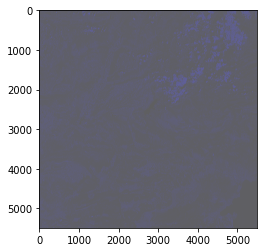

In [17]:
open_jp2=rasterio.open("/home/robert/ds-wildfire/data/scenes/31/T/GJ/2017/6/19/B8AB11B12.jp2")
var2=open_jp2.read((1,2,3)).transpose(1,2,0)
var2=(var2-var2.min())/(var2.max()-var2.min())
var2.shape
pyplot.imshow(var2, cmap='pink')

In [21]:
patch= rasterio.open("/home/robert/ds-wildfire/data/patches/2017/6/19/raster_patch100491_2017_06_19_31_T_GJ.jpg")


In [22]:
patch.meta

{'driver': 'JPEG',
 'dtype': 'uint8',
 'nodata': None,
 'width': 128,
 'height': 128,
 'count': 3,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

In [30]:
store_coco_ground_truth(
                path_to_store_date2, patch_dfs, patch_size, "geometry", "31_T_GJ"
            )

TypeError: Object of type Polygon is not JSON serializable